## 학습곡선, 검증곡선, 그리드서치

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
            'machine-learning-databases'
            '/breast-cancer-wisconsin/wdbc.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.20, stratify = y,
    random_state = 1)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state = 1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))


테스트 정확도: 0.956


In [35]:
import numpy as np
import matplotlib.pyplot as plt

### 학습 곡선으로 편향과 분산 문제 분석

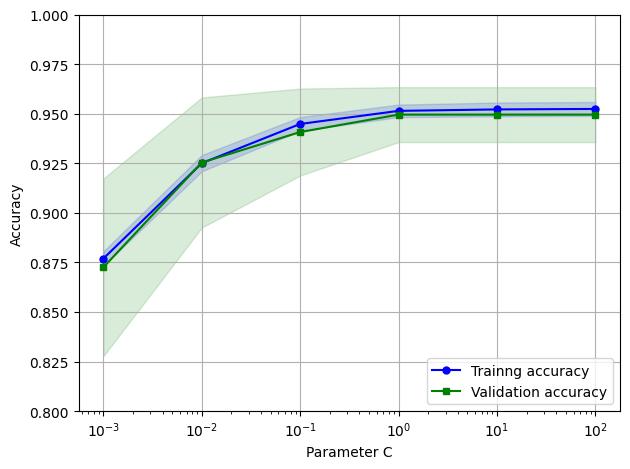

In [36]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator = pipe_lr,
    X = X_train,
    y = y_train,
    param_name = 'logisticregression__C',
    param_range = param_range,
    cv = 10
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', marker = 'o',
    markersize = 5, label = 'Trainng accuracy')

plt.fill_between(param_range, train_mean + train_std,
                train_mean - train_std, alpha = 0.15,
                color = 'blue')

plt.plot(param_range, test_mean, color = 'green', marker = 's',
    markersize = 5, label = 'Validation accuracy')

plt.fill_between(param_range, test_mean + test_std,
                test_mean - test_std, alpha = 0.15,
                color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

### 검증 곡선으로 과대적합과 과소적합 조사

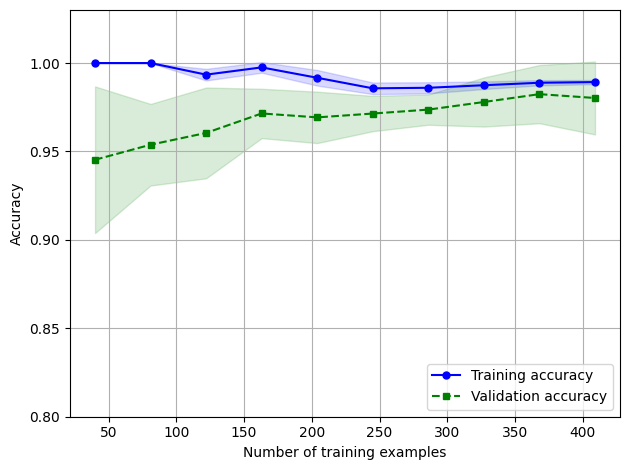

In [37]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state = 1, max_iter = 10000))

train_sizes, train_scores, test_scores =\
         learning_curve(estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        train_sizes = np.linspace(0.1, 1.0, 10),
                        cv = 10,
                        n_jobs = 1)
                                
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
        color = 'blue', marker = 'o',
        markersize = 5, label = 'Training accuracy')

plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean,
        color = 'green', linestyle = '--',
        marker = 's', markersize = 5,
        label = 'Validation accuracy')

plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## 그리드 서치를 사용한 머신러닝 모델 세부튜닝
### 그리드 서치를 사용한 하이퍼파라미터 튜닝

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                        SVC(random_state = 1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C' : param_range,
                'svc__kernel' : ['linear']},
                {'svc__C' : param_range,
                'svc__gamma' : param_range,
                'svc__kernel' : ['rbf']}]
gs = GridSearchCV(estimator = pipe_svc,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    refit = True,
                    cv = 10,
                    n_jobs = 1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [41]:
clf = gs.best_estimator_

print('테스트 정확도 : %.3f' % clf.score(X_test, y_test))

테스트 정확도 : 0.974


In [42]:
gs = GridSearchCV(estimator = pipe_svc,
                param_grid = param_grid,
                scoring = 'accuracy',
                cv = 10,
                return_train_score = True,
                n_jobs= 1)
gs = gs.fit(X_train, y_train)

In [44]:
print(gs.cv_results_['split0_train_score'])
print(gs.cv_results_['mean_train_score'])
print(gs.cv_results_['split0_test_score'])
print('테스트 정확도 : %.3f' % gs.score(X_test, y_test))

[0.6405868  0.93643032 0.97555012 0.98777506 0.98533007 0.99266504
 0.99755501 1.         0.62591687 0.62591687 0.62591687 0.62591687
 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687
 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687
 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687
 0.62591687 0.62591687 0.62591687 0.7799511  0.94621027 0.96577017
 0.62591687 0.62591687 0.62591687 0.62591687 0.78484108 0.94621027
 0.9804401  0.99266504 1.         1.         1.         1.
 0.94621027 0.97799511 0.99266504 1.         1.         1.
 1.         1.         0.97799511 0.98777506 0.99511002 1.
 1.         1.         1.         1.         0.98533007 0.99266504
 1.         1.         1.         1.         1.         1.        ]
[0.6402928  0.93724074 0.97240801 0.98510406 0.98803447 0.99145447
 0.99707019 0.9992677  0.62637307 0.62637307 0.62637307 0.62637307
 0.62637307 0.62637307 0.62637307 0.62637307 0.62637307 0.62637307
 0.62637307 0.6263

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

distribution = loguniform(0.0001, 1000.0)

param_dist = [{'svc__C' : distribution,
                'svc__kernel' : ['linear']},
                {'svc__C' : distribution,
                'svc__gamma' : distribution,
                'svc__kernel' : ['rbf']}]

rs = RandomizedSearchCV(estimator = pipe_svc, 
                        param_distributions = param_dist,
                        n_iter = 30, cv = 10,
                        random_state = 1,
                        n_jobs = -1)
rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)

0.9824637681159419
{'svc__C': 210.6644070836221, 'svc__gamma': 0.0006861724481510375, 'svc__kernel': 'rbf'}


## 성능 평가 지표